In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dataset_cleaned.csv')
df['sex'].replace({0: 'female', 1: 'male'}, inplace=True)

# extract all columns except 'goal' --> X
X = df.loc[:, df.columns != 'goal']
# extract only the column 'goal' --> y
y = df.loc[:, 'goal']

df.head()

age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   1       145   233    1        2      150      0      2.3   
1   67    male   4       160   286    0        2      108      1      1.5   
2   67    male   4       120   229    0        2      129      1      2.6   
3   37    male   3       130   250    0        0      187      0      3.5   
4   41  female   2       130   204    0        2      172      0      1.4   

   slope   ca  thal  goal  
0      3  0.0   6.0     1  
1      2  3.0   3.0     0  
2      2  2.0   7.0     0  
3      3  0.0   3.0     1  
4      1  0.0   3.0     1

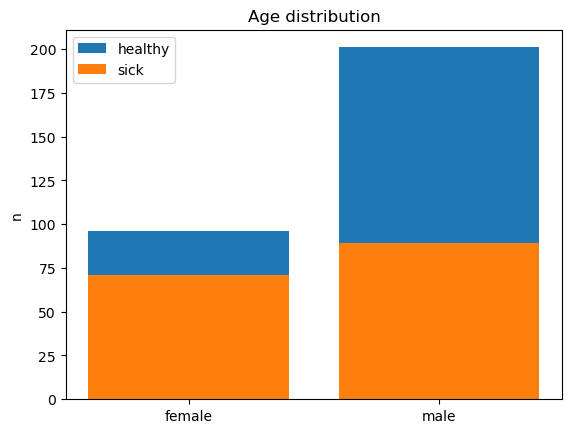

201


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

counts_male = sum(X['sex'] == 'male')
counts_female = sum(X['sex'] == 'female')

counts_male_sick = sum(np.all([X['sex'] == 'male',
                              y > 0], axis=0))
counts_female_sick = sum(np.all([X['sex'] == 'female',
                              y > 0], axis=0))

plt.bar([1, 0], [counts_male, counts_female])
plt.bar([1, 0], [counts_male_sick, counts_female_sick])
plt.xticks([1, 0],['male', 'female'])
plt.ylabel('n')
plt.title('Age distribution')
plt.legend(['healthy', 'sick'])
plt.show()
print(counts_male)

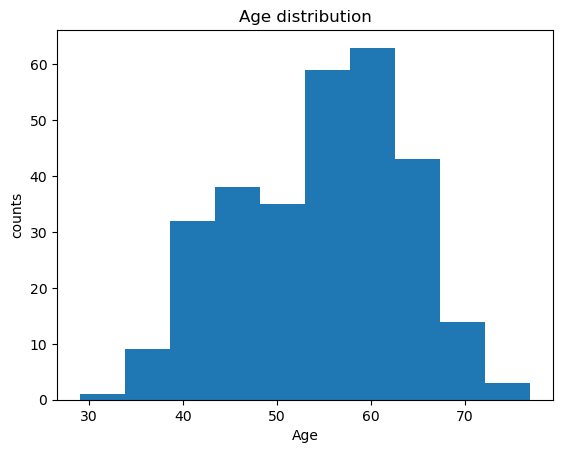

In [3]:
plt.hist(X['age'])
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Age distribution')
plt.show()

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


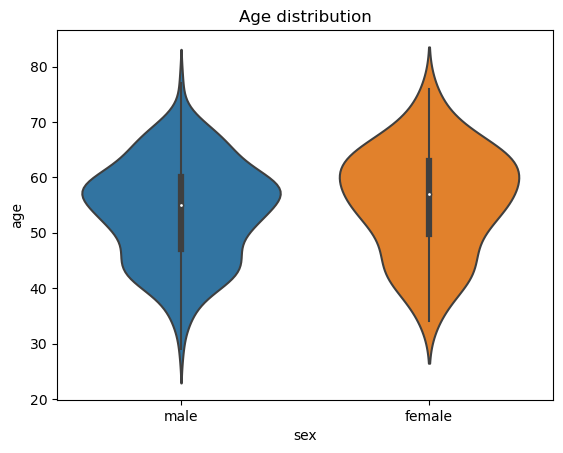

In [4]:
ax = sns.violinplot(X, x='sex', y='age')
ax.set_xticklabels(['male', 'female'])
plt.title('Age distribution')
plt.show()

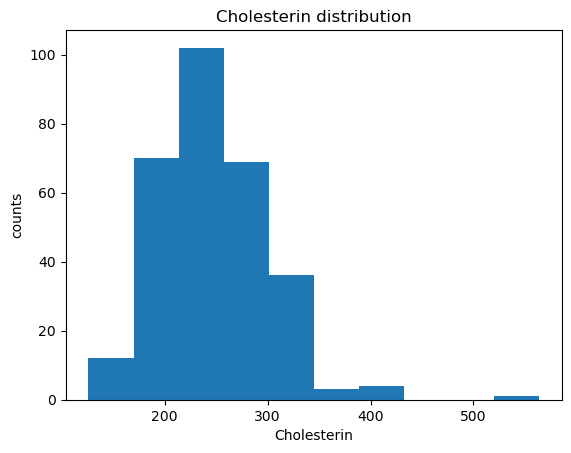

In [5]:
ax = plt.hist(X['chol'])
plt.xlabel('Cholesterin')
plt.ylabel('counts')
plt.title('Cholesterin distribution')
plt.show()

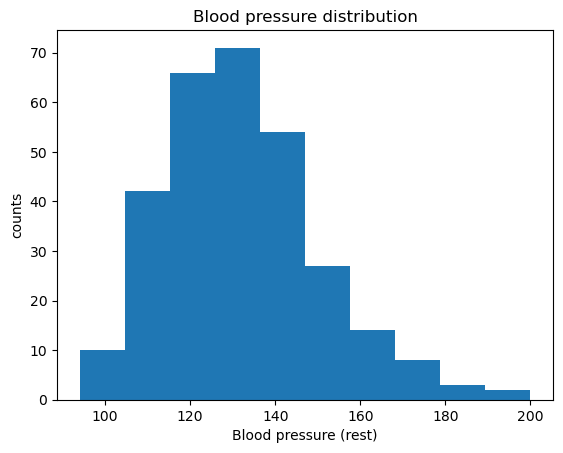

In [6]:
plt.hist(X['trestbps'])
plt.xlabel('Blood pressure (rest)')
plt.ylabel('counts')
plt.title('Blood pressure distribution')
plt.show()

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


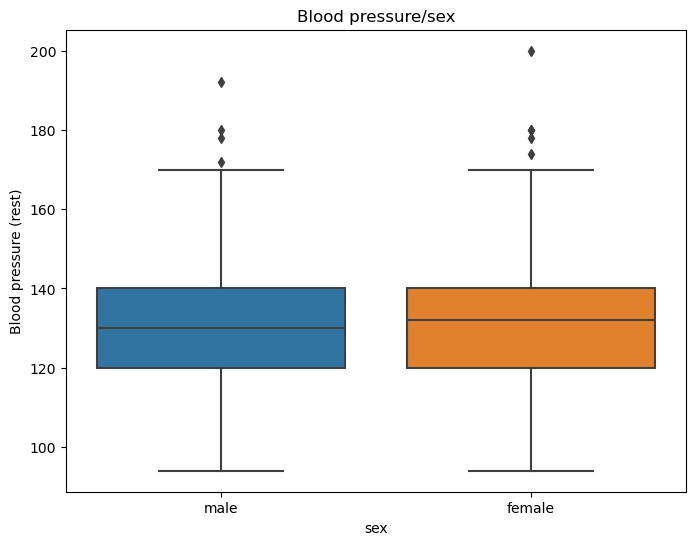

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title('Blood pressure/sex')
plt.xlabel('sex')
plt.ylabel('Blood pressure (rest)')
plt.show()

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

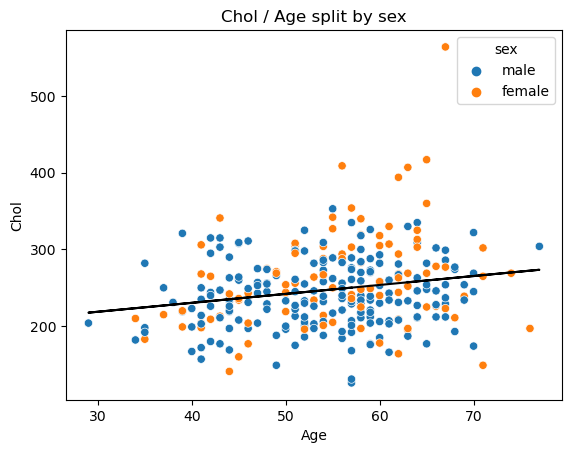

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.array(X['age'])
x = x[:, np.newaxis]
reg = model.fit(x, X['chol'])
pred = reg.predict(x)

sns.scatterplot(X, x='age', y='chol', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('Chol / Age split by sex')
plt.show()

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

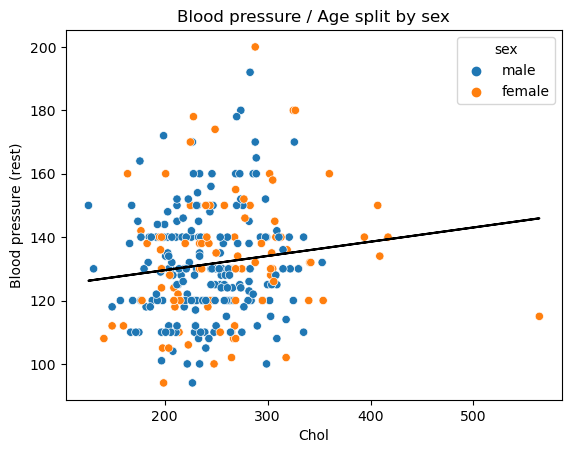

In [9]:
model = LinearRegression()
x = np.array(X['chol'])
x = x[:, np.newaxis]
reg = model.fit(x, X['trestbps'])
pred = reg.predict(x)

sns.scatterplot(X, x='chol', y='trestbps', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Chol')
plt.ylabel('Blood pressure (rest)')
plt.title('Blood pressure / Age split by sex')
plt.show()

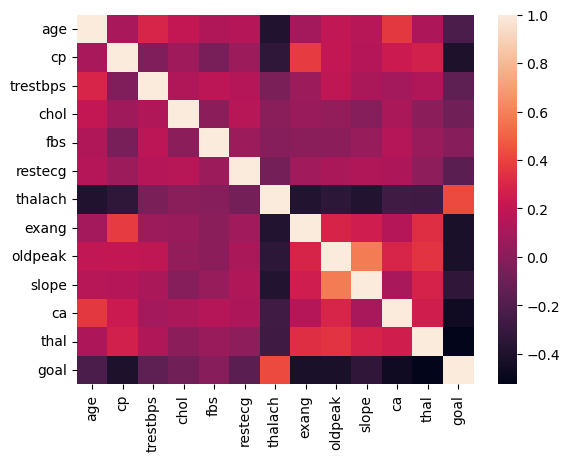

In [47]:
corr = df.loc[:,df.columns!='sex'].corr()

sns.heatmap(corr)
plt.show()

### Cholesterinwerte im Vergleich Frauen/Männer

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


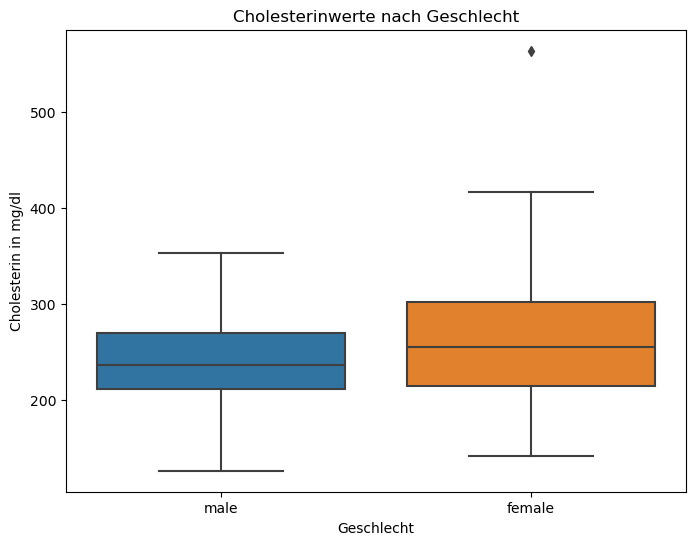

In [12]:
df['sex'] = df['sex'].replace({0: 'female', 1: 'male'})
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterinwerte nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Cholesterin in mg/dl')
plt.show()

In [13]:
# Konfidenzintervall (95%) für Cholesterin Level jeweils für Männer und Frauen
from scipy import stats

# Filtern nach Geschlecht und Berechnen des Konfidenzintervalls
conf_level = 0.95
chol_men = df.loc[df['sex'] == 'male', 'chol']
chol_women = df.loc[df['sex'] == 'female', 'chol']
conf_int_men = stats.t.interval(conf_level, len(chol_men) - 1, loc=chol_men.mean(), scale=stats.sem(chol_men))
conf_int_women = stats.t.interval(conf_level, len(chol_women) - 1, loc=chol_women.mean(), scale=stats.sem(chol_women))

result_table_men_vs_women = pd.DataFrame({
    'Geschlecht': ['Männer', 'Frauen'],
    'Untere_Grenze': [conf_int_men[0], conf_int_women[0]],
    'Obere_Grenze': [conf_int_men[1], conf_int_women[1]]
})

print(result_table_men_vs_women)

  Geschlecht  Untere_Grenze  Obere_Grenze
0     Männer     234.288517    246.199046
1     Frauen     249.044612    275.413721


### Cholesterin im Vergleich zur Erkrankung

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


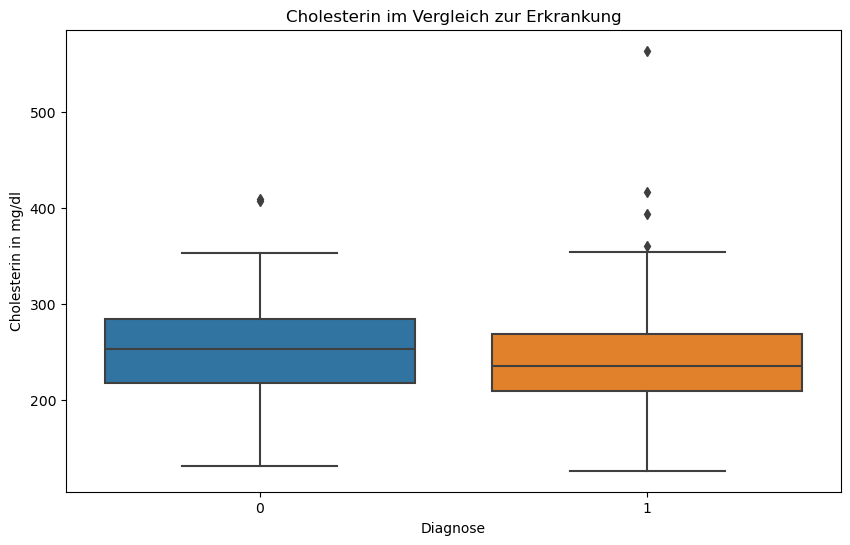

In [15]:
# Boxplot gruppiert nach Diagnose
plt.figure(figsize=(10, 6))
sns.boxplot(x='goal', y='chol', data=df)
plt.title('Cholesterin im Vergleich zur Erkrankung')
plt.xlabel('Diagnose')
plt.ylabel('Cholesterin in mg/dl')
plt.show()

In [16]:
# t-Test
# Nullhypothese (HO) = Cholesterinwert bei Kranken ist gleich oder kleiner wie bei Gesunden
# Alternativhypothese (H1) Cholesterinwert bei Kranken ist höher als bei Gesunden

from scipy.stats import ttest_ind

# Daten für gesunde und kranke Personen
chol_healthy = df.loc[df['goal'] == 0, 'chol']
chol_sick = df.loc[df['goal'] == 1, 'chol']

# Durchführung des t-Tests
t_statistic, p_value = ttest_ind(chol_sick, chol_healthy, alternative='greater')

# Ausgabe der Ergebnisse
print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)

# Überprüfung der Nullhypothese
if p_value < 0.05:
    print("Der p-Wert ist kleiner als 0.05, daher wird die Nullhypothese abgelehnt.")
    print("Es gibt signifikante Hinweise darauf, dass der Cholesterinwert bei kranken Personen höher ist als bei gesunden Personen.")
else:
    print("Der p-Wert ist größer als oder gleich 0.05, daher wird die Nullhypothese nicht abgelehnt.")
    print("Es gibt keine signifikanten Hinweise darauf, dass der Cholesterinwert bei kranken Personen höher ist als bei gesunden Personen.")

t-Statistik: -1.3834015443480652
p-Wert: 0.9162061164262881
Der p-Wert ist größer als oder gleich 0.05, daher wird die Nullhypothese nicht abgelehnt.
Es gibt keine signifikanten Hinweise darauf, dass der Cholesterinwert bei kranken Personen höher ist als bei gesunden Personen.


### Systolischer Ruheblutdruck

/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


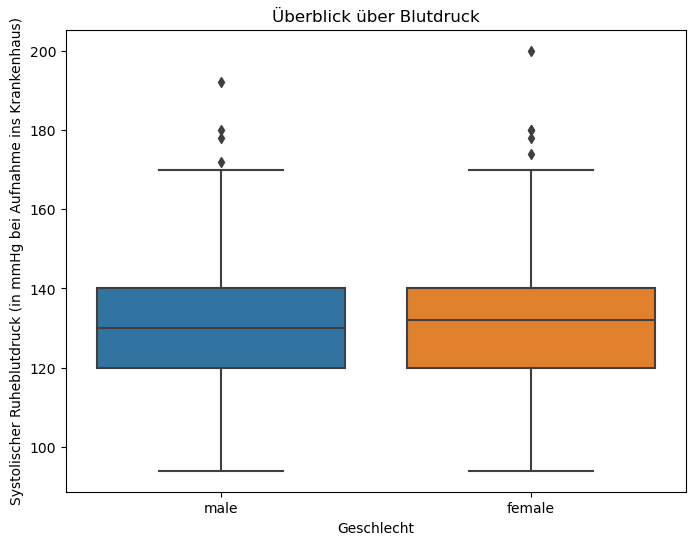

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title('Überblick über Blutdruck')
plt.xlabel('Geschlecht')
plt.ylabel('Systolischer Ruheblutdruck (in mmHg bei Aufnahme ins Krankenhaus)')
plt.show()

In [19]:
# Filtern nach goal und Berechnen des Konfidenzintervalls
conf_level = 0.95
blutdruck_gesund = df.loc[df['goal'] == 0, 'trestbps']
blutdruck_krank = df.loc[df['goal'] == 1, 'trestbps']
conf_int_gesund = stats.t.interval(conf_level, len(blutdruck_gesund) - 1, loc=blutdruck_gesund.mean(), scale=stats.sem(blutdruck_gesund))
conf_int_krank = stats.t.interval(conf_level, len(blutdruck_krank) - 1, loc=blutdruck_krank.mean(), scale=stats.sem(blutdruck_krank))

# Erstellen der Tabelle
result_table_blutdruck = pd.DataFrame({
    'Diagnose': ['Gesund', 'Krank'],
    'Untere_Grenze': [conf_int_gesund[0], conf_int_krank[0]],
    'Obere_Grenze': [conf_int_gesund[1], conf_int_krank[1]]
})

# Anzeige der Tabelle
print(result_table_blutdruck)

  Diagnose  Untere_Grenze  Obere_Grenze
0   Gesund     131.442350    137.827723
1    Krank     126.618412    131.731588


In [20]:
# t-Test
# H0 Kranke haben einen niedrigeren oder gleichen Blutdruck wie Gesunde
# H1 Kranke haben einen höheren BLutdruck als Gesunde

# Daten für gesunde und kranke Personen
blutdruck_healthy = df.loc[df['goal'] == 0, 'trestbps']
blutdruck_sick = df.loc[df['goal'] == 1, 'trestbps']

# Durchführung des t-Tests
t_statistic, p_value = ttest_ind(blutdruck_sick, blutdruck_healthy, alternative='greater')

print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)

# Überprüfung Nullhypothese
if p_value < 0.05:
    print("Der p-Wert ist kleiner als 0.05, daher wird die Nullhypothese abgelehnt.")
    print("Es gibt signifikante Hinweise darauf, dass der Blutdruck bei kranken Personen höher ist als bei gesunden Personen.")
else:
    print("Der p-Wert ist größer als oder gleich 0.05, daher wird die Nullhypothese nicht abgelehnt.")
    print("Es gibt keine signifikanten Hinweise darauf, dass der Blutdruck bei kranken Personen höher ist als bei gesunden Personen.")

t-Statistik: -2.6678917570482685
p-Wert: 0.9959726018205624
Der p-Wert ist größer als oder gleich 0.05, daher wird die Nullhypothese nicht abgelehnt.
Es gibt keine signifikanten Hinweise darauf, dass der Blutdruck bei kranken Personen höher ist als bei gesunden Personen.
